<a href="https://colab.research.google.com/github/worawit-saetan/Kaggle-Dataset-Loan-Prediction-Project/blob/main/Kaggle_Dataset_Loan_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Dataset - Loan Prediction Project
The outline 



*   Load data and divide the dataset (prevent from seeing the test data)
*   Explore the data
*   Feature Engineering
  * Deal with missing values in categorical and numerical columns 
  * Drop unnecessary column
  * Encode the categorical columns with Ordinal and One hot encoder
  * Encode the target column using Label encoder
  * Drop some original categorical columns

*   Develop models 
  * GaussianNB
  * XGBoost using Grid Search CV
  * Random Forest using Randomized Search

* Select and save the model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("/content/dataset from Kaggle Loan prediction.csv")

In [3]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Definition of each column
Loan_ID	: Unique Loan ID

Gender	: Male/Female 

Married	: Applicant married (Yes/No)

Dependents : Number of dependents

Education	: Education of Applicant (Graduate/ Not Graduate)

Self_Employed	:  Self employed (Yes/No)

ApplicantIncome	: Applicant income

CoapplicantIncome : Co-applicant income	

LoanAmount : Loan amount in thousands

Loan_Amount_Term : Term of loan in months

Credit_History : Credit history meets guildlines

Property_Area	: Urban/ Semi Urban/ Rural

Loan_Status : (Target) Loan approved (Yes/No)

In [4]:
dataset.shape

(614, 13)

this dataset has 614 rows and 13 columns.



Before we start the data analysis, we will split the data into training set and test set (80/20)
in order to prevent looking and analysing at the test set (the unseen data)

In [5]:
X = dataset.drop(["Loan_Status"],axis=1)
y = dataset["Loan_Status"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(491, 12)
(123, 12)
(491,)
(123,)


we have 491 rows for training set and 123 rows for test set

Let's explore our training dataset

In [7]:
X_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
83,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban
90,LP001316,Male,Yes,0,Graduate,No,2958,2900.0,131.0,360.0,1.0,Semiurban
227,LP001758,Male,Yes,2,Graduate,No,6250,1695.0,210.0,360.0,1.0,Semiurban
482,LP002537,Male,Yes,0,Graduate,No,2083,3150.0,128.0,360.0,1.0,Semiurban
464,LP002493,Male,No,0,Graduate,No,4166,0.0,98.0,360.0,0.0,Semiurban


In [8]:
X_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,491.000000,491.000000,475.000000,479.000000,451.000000
mean,5502.645621,1676.488635,148.722105,340.283925,0.844789
std,5932.951396,3177.641499,87.719000,67.708849,0.362507
min,150.000000,0.000000,17.000000,12.000000,0.000000
25%,2918.500000,0.000000,100.000000,360.000000,1.000000
50%,3900.000000,1126.000000,129.000000,360.000000,1.000000
75%,5938.000000,2333.000000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 83 to 102
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            491 non-null    object 
 1   Gender             479 non-null    object 
 2   Married            490 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          491 non-null    object 
 5   Self_Employed      467 non-null    object 
 6   ApplicantIncome    491 non-null    int64  
 7   CoapplicantIncome  491 non-null    float64
 8   LoanAmount         475 non-null    float64
 9   Loan_Amount_Term   479 non-null    float64
 10  Credit_History     451 non-null    float64
 11  Property_Area      491 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 49.9+ KB


Let's view the gender columns

Men tends to take loan applications more than Women

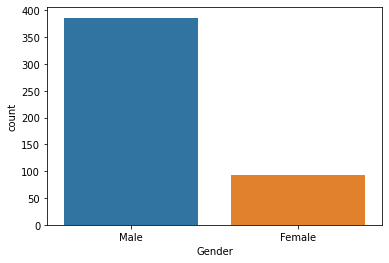

In [10]:
sns.countplot(x=X_train["Gender"])
plt.show()

Let's view the Dependents columns

a person who has less dependents tends to take loan more than a person who has more dependents

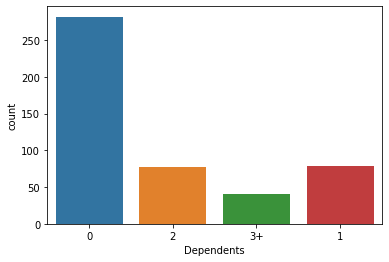

In [11]:
sns.countplot(x=X_train["Dependents"])
plt.show()

Let's view the Self_Employed columns

a non Self-Employed person tends to take loan more than a Self-employed person.

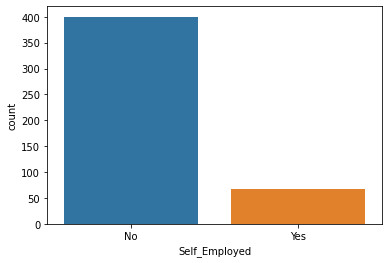

In [12]:
sns.countplot(x=X_train["Self_Employed"])
plt.show()

Let's plot the correlation matrix 

the correlation between the ApplicantIncome increase and the loan amount is 0.54 that means if the applicant's income is high, an amount of loan of that  applicant will be high too.

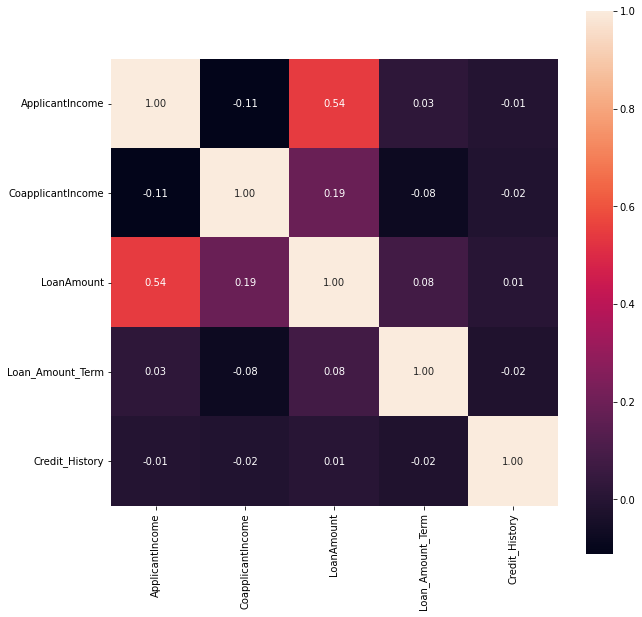

In [13]:
plt.figure(figsize=[10,10])
corr = X_train.corr()
sns.heatmap(corr,square=True,fmt='.2f',annot=True,cbar=True)
plt.show()

We will delete the Loan ID column because it is just an ID

In [14]:
X_train = X_train.drop(["Loan_ID"],axis=1)
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
83,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban
90,Male,Yes,0,Graduate,No,2958,2900.0,131.0,360.0,1.0,Semiurban
227,Male,Yes,2,Graduate,No,6250,1695.0,210.0,360.0,1.0,Semiurban
482,Male,Yes,0,Graduate,No,2083,3150.0,128.0,360.0,1.0,Semiurban
464,Male,No,0,Graduate,No,4166,0.0,98.0,360.0,0.0,Semiurban


In [15]:
X_train.shape

(491, 11)

Let's find null values in each column and calculate percentages of null values in each column

In [16]:
X_train.isnull().sum()

Gender               12
Married               1
Dependents           11
Education             0
Self_Employed        24
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term     12
Credit_History       40
Property_Area         0
dtype: int64

In [17]:
X_train.isnull().sum()/X_train.shape[0]

Gender               0.024440
Married              0.002037
Dependents           0.022403
Education            0.000000
Self_Employed        0.048880
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.032587
Loan_Amount_Term     0.024440
Credit_History       0.081466
Property_Area        0.000000
dtype: float64

We found the missing values as their percentages : 

Categorical Value:

*   Gender column 2.44% 
*   Married column 0.20%
*   Dependents column 2.24% 
*   Self_Employed column 4.88%


Numerical Value : 

*   LoanAmount column 3.25% 
*   Loan_Amount_Term 2.44% 
*   Credit_History 8.14% 













Lets fill null-value cells of the categorical columns with the most frequently appeared values in each column

We use SimpleImputer from sklearn library and set the strategy to 'most_frequent'

In [18]:
from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent') 

define the categorical_features and use the imputer to fit the training data

In [19]:
categorical_features = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']

imp_mode.fit(X_train[categorical_features])

SimpleImputer(strategy='most_frequent')

Then transform the training data to fill the missing values

In [20]:
imp_mode.transform(X_train[categorical_features])

array([['Male', 'Yes', '0', 'Graduate', 'No', 'Semiurban'],
       ['Male', 'Yes', '0', 'Graduate', 'No', 'Semiurban'],
       ['Male', 'Yes', '2', 'Graduate', 'No', 'Semiurban'],
       ...,
       ['Female', 'No', '0', 'Graduate', 'No', 'Urban'],
       ['Female', 'Yes', '0', 'Graduate', 'No', 'Semiurban'],
       ['Male', 'Yes', '0', 'Graduate', 'No', 'Urban']], dtype=object)

Let's assign it back to X_train.

In [21]:
X_train[categorical_features] = imp_mode.transform(X_train[categorical_features])

Let's check null values in categorical columns. Now null values have gone.

In [22]:
X_train.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term     12
Credit_History       40
Property_Area         0
dtype: int64

Lets fill null values cells of the numerical columns with the median values in each column

We use SimpleImputer from sklearn library and set the strategy to 'median'

In [23]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median') 

define the numerical_features and use the imputer to fit the training data

In [24]:
numerical_features = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

In [25]:
imp_median.fit(X_train[numerical_features])

SimpleImputer(strategy='median')

Then transform the training data to fill the missing values

In [26]:
imp_median.transform(X_train[numerical_features])

array([[6.0000e+03, 2.2500e+03, 2.6500e+02, 3.6000e+02, 1.0000e+00],
       [2.9580e+03, 2.9000e+03, 1.3100e+02, 3.6000e+02, 1.0000e+00],
       [6.2500e+03, 1.6950e+03, 2.1000e+02, 3.6000e+02, 1.0000e+00],
       ...,
       [3.2370e+03, 0.0000e+00, 3.0000e+01, 3.6000e+02, 1.0000e+00],
       [1.0047e+04, 0.0000e+00, 1.2900e+02, 2.4000e+02, 1.0000e+00],
       [1.3650e+04, 0.0000e+00, 1.2900e+02, 3.6000e+02, 1.0000e+00]])

Let's assign it back to X_train.

In [27]:
X_train[numerical_features] = imp_median.transform(X_train[numerical_features])

Let's check null values in numerical columns. null values have gone.

In [28]:
X_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

Let's see the feature_names and statistics of the imp_mode and imp_median imputer.

In [29]:
pd.DataFrame(imp_mode.statistics_,index=imp_mode.feature_names_in_,columns=['imp_mode'])

,imp_mode
Gender,Male
Married,Yes
Dependents,0
Education,Graduate
Self_Employed,No
Property_Area,Semiurban


In [30]:
pd.DataFrame(imp_median.statistics_,index=imp_median.feature_names_in_,columns=['imp_median'])

,imp_median
ApplicantIncome,3900.0
CoapplicantIncome,1126.0
LoanAmount,129.0
Loan_Amount_Term,360.0
Credit_History,1.0


We have filled all null values. 

Then we will encode the categorical columns. First,we will use ordinal encoder to encode the columns that contain ordinal data.

In [31]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_enc_X = OrdinalEncoder()

In [32]:
ordinal_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed']
norminal_features = ['Property_Area']

In [33]:
ordinal_enc_X.fit(X_train[ordinal_features])
X_train[ordinal_features] = ordinal_enc_X.transform(X_train[ordinal_features])

In [34]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
83,1.0,1.0,0.0,0.0,0.0,6000.0,2250.0,265.0,360.0,1.0,Semiurban
90,1.0,1.0,0.0,0.0,0.0,2958.0,2900.0,131.0,360.0,1.0,Semiurban
227,1.0,1.0,2.0,0.0,0.0,6250.0,1695.0,210.0,360.0,1.0,Semiurban
482,1.0,1.0,0.0,0.0,0.0,2083.0,3150.0,128.0,360.0,1.0,Semiurban
464,1.0,0.0,0.0,0.0,0.0,4166.0,0.0,98.0,360.0,0.0,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...
71,1.0,1.0,2.0,1.0,1.0,1875.0,1875.0,97.0,360.0,1.0,Semiurban
106,1.0,1.0,2.0,0.0,0.0,11417.0,1126.0,225.0,360.0,1.0,Urban
270,0.0,0.0,0.0,0.0,0.0,3237.0,0.0,30.0,360.0,1.0,Urban
435,0.0,1.0,0.0,0.0,0.0,10047.0,0.0,129.0,240.0,1.0,Semiurban


In [35]:
ordinal_enc_X.feature_names_in_

array(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed'],
      dtype=object)

In [36]:
ordinal_enc_X.categories_
# ordinal_enc_X.inverse_transform() use for inverse

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['0', '1', '2', '3+'], dtype=object),
 array(['Graduate', 'Not Graduate'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

Next, we will use one hot encoder to encode the columns that contain norminal data 

In [37]:
from sklearn.preprocessing import OneHotEncoder

In [38]:
onehot_enc = OneHotEncoder(handle_unknown='ignore')

In [39]:
# need to reshape(-1,1) because one hot encoder requires matrix not vector , and need to convert dataframe to array because function reshape(-1.1) will be available only for an array 
onehot_enc.fit(np.array(X_train['Property_Area']).reshape(-1,1))

OneHotEncoder(handle_unknown='ignore')

In [40]:
onehot_enc.categories_

[array(['Rural', 'Semiurban', 'Urban'], dtype=object)]

In [41]:
Property_Area_feature = onehot_enc.get_feature_names_out()
onehot_enc.get_feature_names_out()

array(['x0_Rural', 'x0_Semiurban', 'x0_Urban'], dtype=object)

In [42]:
# need toarray() function to convert sparse matrix into an array
onehot_enc.transform(np.array(X_train['Property_Area']).reshape(-1,1)).toarray()

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [43]:
X_train[Property_Area_feature] = onehot_enc.transform(np.array(X_train['Property_Area']).reshape(-1,1)).toarray()

In [44]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,x0_Rural,x0_Semiurban,x0_Urban
83,1.0,1.0,0.0,0.0,0.0,6000.0,2250.0,265.0,360.0,1.0,Semiurban,0.0,1.0,0.0
90,1.0,1.0,0.0,0.0,0.0,2958.0,2900.0,131.0,360.0,1.0,Semiurban,0.0,1.0,0.0
227,1.0,1.0,2.0,0.0,0.0,6250.0,1695.0,210.0,360.0,1.0,Semiurban,0.0,1.0,0.0
482,1.0,1.0,0.0,0.0,0.0,2083.0,3150.0,128.0,360.0,1.0,Semiurban,0.0,1.0,0.0
464,1.0,0.0,0.0,0.0,0.0,4166.0,0.0,98.0,360.0,0.0,Semiurban,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1.0,1.0,2.0,1.0,1.0,1875.0,1875.0,97.0,360.0,1.0,Semiurban,0.0,1.0,0.0
106,1.0,1.0,2.0,0.0,0.0,11417.0,1126.0,225.0,360.0,1.0,Urban,0.0,0.0,1.0
270,0.0,0.0,0.0,0.0,0.0,3237.0,0.0,30.0,360.0,1.0,Urban,0.0,0.0,1.0
435,0.0,1.0,0.0,0.0,0.0,10047.0,0.0,129.0,240.0,1.0,Semiurban,0.0,1.0,0.0


delete the original Property_Area columm

In [45]:
X_train.drop(["Property_Area"],axis=1,inplace=True)

In [46]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,x0_Rural,x0_Semiurban,x0_Urban
83,1.0,1.0,0.0,0.0,0.0,6000.0,2250.0,265.0,360.0,1.0,0.0,1.0,0.0
90,1.0,1.0,0.0,0.0,0.0,2958.0,2900.0,131.0,360.0,1.0,0.0,1.0,0.0
227,1.0,1.0,2.0,0.0,0.0,6250.0,1695.0,210.0,360.0,1.0,0.0,1.0,0.0
482,1.0,1.0,0.0,0.0,0.0,2083.0,3150.0,128.0,360.0,1.0,0.0,1.0,0.0
464,1.0,0.0,0.0,0.0,0.0,4166.0,0.0,98.0,360.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1.0,1.0,2.0,1.0,1.0,1875.0,1875.0,97.0,360.0,1.0,0.0,1.0,0.0
106,1.0,1.0,2.0,0.0,0.0,11417.0,1126.0,225.0,360.0,1.0,0.0,0.0,1.0
270,0.0,0.0,0.0,0.0,0.0,3237.0,0.0,30.0,360.0,1.0,0.0,0.0,1.0
435,0.0,1.0,0.0,0.0,0.0,10047.0,0.0,129.0,240.0,1.0,0.0,1.0,0.0


In [47]:
X_train.dtypes

Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
x0_Rural             float64
x0_Semiurban         float64
x0_Urban             float64
dtype: object

convert data types of columns that contain integer values from float64 into int

In [48]:
X_train[np.concatenate((ordinal_features,Property_Area_feature))] = X_train[np.concatenate((ordinal_features,Property_Area_feature))].astype('int')

In [49]:
X_train.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
x0_Rural               int64
x0_Semiurban           int64
x0_Urban               int64
dtype: object

Then we encode the target column by using Label encoder

In [50]:
from sklearn.preprocessing import LabelEncoder
label_enc_y = LabelEncoder()
label_enc_y.fit(y_train)

LabelEncoder()

In [51]:
label_enc_y.transform(y_train)

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,

In [52]:
y_train = label_enc_y.transform(y_train)

In [53]:
#label_enc_y.inverse_transform(['N', 'Y']) uses for inverse transform

In [54]:
label_enc_y.classes_

array(['N', 'Y'], dtype=object)

Then, we will have to deal with the test set by doing the same process as we do with the training data.

Let's check X_test and y_test / and see the null values

In [55]:
X_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
350,LP002139,Male,Yes,0,Graduate,No,9083,0.0,228.0,360.0,1.0,Semiurban
377,LP002223,Male,Yes,0,Graduate,No,4310,0.0,130.0,360.0,NaN,Semiurban
163,LP001570,Male,Yes,2,Graduate,No,4167,1447.0,158.0,360.0,1.0,Rural
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
132,LP001478,Male,No,0,Graduate,No,2718,0.0,70.0,360.0,1.0,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...,...
231,LP001768,Male,Yes,0,Graduate,NaN,3716,0.0,42.0,180.0,1.0,Rural
312,LP002006,Female,No,0,Graduate,No,2507,0.0,56.0,360.0,1.0,Rural
248,LP001824,Male,Yes,1,Graduate,No,2882,1843.0,123.0,480.0,1.0,Semiurban
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban


In [56]:
y_test

350    Y
377    Y
163    Y
609    Y
132    Y
      ..
231    Y
312    Y
248    Y
11     Y
333    Y
Name: Loan_Status, Length: 123, dtype: object

In [57]:
X_test.isnull().sum()

Loan_ID               0
Gender                1
Married               2
Dependents            4
Education             0
Self_Employed         8
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            6
Loan_Amount_Term      2
Credit_History       10
Property_Area         0
dtype: int64

eliminate the unnecessary column (Loan ID)

and then use the mode and median imputer to fill the cells with null values

In [58]:
X_test = X_test.drop(["Loan_ID"],axis=1)

In [59]:
X_test[categorical_features] = imp_mode.transform(X_test[categorical_features])
X_test[numerical_features] = imp_median.transform(X_test[numerical_features])
X_test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

Now, the null values have fulfilled. 

Next, encode the columns of X_test 

In [60]:
X_test[ordinal_features] = ordinal_enc_X.transform(X_test[ordinal_features])
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
350,1.0,1.0,0.0,0.0,0.0,9083.0,0.0,228.0,360.0,1.0,Semiurban
377,1.0,1.0,0.0,0.0,0.0,4310.0,0.0,130.0,360.0,1.0,Semiurban
163,1.0,1.0,2.0,0.0,0.0,4167.0,1447.0,158.0,360.0,1.0,Rural
609,0.0,0.0,0.0,0.0,0.0,2900.0,0.0,71.0,360.0,1.0,Rural
132,1.0,0.0,0.0,0.0,0.0,2718.0,0.0,70.0,360.0,1.0,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...
231,1.0,1.0,0.0,0.0,0.0,3716.0,0.0,42.0,180.0,1.0,Rural
312,0.0,0.0,0.0,0.0,0.0,2507.0,0.0,56.0,360.0,1.0,Rural
248,1.0,1.0,1.0,0.0,0.0,2882.0,1843.0,123.0,480.0,1.0,Semiurban
11,1.0,1.0,2.0,0.0,0.0,2500.0,1840.0,109.0,360.0,1.0,Urban


In [61]:
X_test[Property_Area_feature] = onehot_enc.transform(np.array(X_test['Property_Area']).reshape(-1,1)).toarray()
X_test.drop(["Property_Area"],axis=1,inplace=True)
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,x0_Rural,x0_Semiurban,x0_Urban
350,1.0,1.0,0.0,0.0,0.0,9083.0,0.0,228.0,360.0,1.0,0.0,1.0,0.0
377,1.0,1.0,0.0,0.0,0.0,4310.0,0.0,130.0,360.0,1.0,0.0,1.0,0.0
163,1.0,1.0,2.0,0.0,0.0,4167.0,1447.0,158.0,360.0,1.0,1.0,0.0,0.0
609,0.0,0.0,0.0,0.0,0.0,2900.0,0.0,71.0,360.0,1.0,1.0,0.0,0.0
132,1.0,0.0,0.0,0.0,0.0,2718.0,0.0,70.0,360.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,1.0,1.0,0.0,0.0,0.0,3716.0,0.0,42.0,180.0,1.0,1.0,0.0,0.0
312,0.0,0.0,0.0,0.0,0.0,2507.0,0.0,56.0,360.0,1.0,1.0,0.0,0.0
248,1.0,1.0,1.0,0.0,0.0,2882.0,1843.0,123.0,480.0,1.0,0.0,1.0,0.0
11,1.0,1.0,2.0,0.0,0.0,2500.0,1840.0,109.0,360.0,1.0,0.0,0.0,1.0


Then convert the data types of some columns of X_test

In [62]:
X_test[np.concatenate((ordinal_features,Property_Area_feature))] = X_test[np.concatenate((ordinal_features,Property_Area_feature))].astype('int')

In [63]:
X_test.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
x0_Rural               int64
x0_Semiurban           int64
x0_Urban               int64
dtype: object

Next, let's encode the target column

In [64]:
y_test = label_enc_y.transform(y_test)
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [65]:
#label_enc_y.inverse_transform(y_test) is used to tranform the encoded value to the original 

# Model development 

we will try to use simple GaussianNB without hyperparameter tuning to fit the training dataset to see how well it can perform on this dataset



In [66]:
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(X_train,y_train)

GaussianNB()

In [67]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_train,gnb_model.predict(X_train))

0.8004073319755601

In [68]:
accuracy_score(y_test,gnb_model.predict(X_test))

0.7804878048780488

the accuracy of GaussianNB is

  * 0.8004073319755601 on training set

  * 0.7804878048780488 on test set

it do a great job on this dataset

Next we will try the support vector machine(svm) with Grid Search hyperparameter tuning.

In [69]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc = SVC()

param_grid_svc = {
    'C' : [0.1, 1, 10, 100, 1000],
    'gamma' : [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel' : ['rbf']
}

svc_grid = GridSearchCV(estimator=svc , param_grid=param_grid_svc, cv=5, verbose=3, scoring='accuracy')

In [70]:
svc_grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.697 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.704 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.697 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.704 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.697 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

In [71]:
svc_grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [72]:
svc_grid.best_score_

0.6965367965367966

In [73]:
accuracy_score(y_test,svc_grid.predict(X_test))

0.6504065040650406

the accuracy of SVM with Grid Search hyperparameter tuning is

  * 0.6965367965367966 on training set

  * 0.6504065040650406 on test set

SVM doesn't perform well on this dataset

Next we will try xgboost with Grid Search hyperparameter tuning.

In [74]:
from xgboost import XGBClassifier
xgb = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

params_xgb = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(100, 210, 10),
    'learning_rate': [0.1, 0.01, 0.05]
}
gs_xgb = GridSearchCV(estimator=xgb , param_grid=params_xgb, cv=5, verbose=3, scoring='accuracy')

In [75]:
gs_xgb.fit(X_train,y_train)

Fitting 5 folds for each of 264 candidates, totalling 1320 fits
[CV 1/5] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=0.859 total time=   0.2s
[CV 2/5] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=0.806 total time=   0.1s
[CV 3/5] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=0.796 total time=   0.1s
[CV 4/5] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=0.786 total time=   0.1s
[CV 5/5] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=0.796 total time=   0.1s
[CV 1/5] END learning_rate=0.1, max_depth=2, n_estimators=110;, score=0.859 total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_depth=2, n_estimators=110;, score=0.806 total time=   0.1s
[CV 3/5] END learning_rate=0.1, max_depth=2, n_estimators=110;, score=0.796 total time=   0.1s
[CV 4/5] END learning_rate=0.1, max_depth=2, n_estimators=110;, score=0.786 total time=   0.2s
[CV 5/5] END learning_rate=0.1, max_depth=2, n_estimators=110;, score=0.796 total

GridSearchCV(cv=5, estimator=XGBClassifier(nthread=4, seed=42),
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(100, 210, 10)},
             scoring='accuracy', verbose=3)

In [76]:
gs_xgb.best_params_

{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 100}

In [77]:
gs_xgb.best_score_

0.8145949288806431

In [78]:
accuracy_score(y_test,gs_xgb.predict(X_test))

0.7886178861788617

the accuracy of xgboost is

  * 0.8145949288806431 on training set

  * 0.7886178861788617 on test set

xgboost perform well on this dataset

Next we will try Random Forest with Randomized Search hyperparameter tuning.

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV 

rf = RandomForestClassifier(random_state=42)

params_rf = {'criterion':['entropy', 'gini'],
        'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01,0.05],
        'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
        'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
        'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
        'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
        'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
        'max_depth':[None, 2,4,6,8],
        'n_estimators': range(100,201,10),
}

rs_rf = RandomizedSearchCV(estimator=rf, param_distributions=params_rf, n_iter=200, cv=5, verbose=3, scoring='accuracy') 

In [80]:
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV 1/5] END criterion=gini, max_depth=4, max_features=0.95, max_leaf_nodes=30, min_impurity_decrease=0.2, min_samples_leaf=0.03, min_samples_split=5, min_weight_fraction_leaf=0.0075, n_estimators=110;, score=0.697 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=4, max_features=0.95, max_leaf_nodes=30, min_impurity_decrease=0.2, min_samples_leaf=0.03, min_samples_split=5, min_weight_fraction_leaf=0.0075, n_estimators=110;, score=0.694 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=4, max_features=0.95, max_leaf_nodes=30, min_impurity_decrease=0.2, min_samples_leaf=0.03, min_samples_split=5, min_weight_fraction_leaf=0.0075, n_estimators=110;, score=0.694 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=4, max_features=0.95, max_leaf_nodes=30, min_impurity_decrease=0.2, min_samples_leaf=0.03, min_samples_split=5, min_weight_fraction_leaf=0.0075, n_estimators=110;, score=0.694 total time=   0.2s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=200,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [None, 2, 4, 6, 8],
                                        'max_features': ['auto', 0.95, 0.9,
                                                         0.85, 0.8, 0.75, 0.7],
                                        'max_leaf_nodes': [10, 15, 20, 25, 30,
                                                           35, 40, 45, 50,
                                                           None],
                                        'min_impurity_decrease': [0.0, 0.0005,
                                                                  0.005, 0.05,
                                                                  0.1, 0.15,
                                                                  0.2],
                                        'min_samples_leaf': [1,

In [81]:
rs_rf.best_params_

{'n_estimators': 110,
 'min_weight_fraction_leaf': 0.0025,
 'min_samples_split': 3,
 'min_samples_leaf': 0.04,
 'min_impurity_decrease': 0.0,
 'max_leaf_nodes': 10,
 'max_features': 0.75,
 'max_depth': 4,
 'criterion': 'gini'}

In [82]:
rs_rf.best_score_

0.8145949288806431

In [83]:
accuracy_score(y_test,rs_rf.predict(X_test))

0.7886178861788617

the accuracy of Random Forest is

  * 0.8145949288806431 on training set

  * 0.7886178861788617 on test set

Great on this dataset

We will choose this Random Forest model due to its higher accuracy than the other models and then save and load our model.

In [84]:
import joblib
joblib.dump(rs_rf,'Random_Forest_Grid_Search.pkl')
loaded_model = joblib.load('Random_Forest_Grid_Search.pkl')

In [85]:
accuracy_score(y_test,loaded_model.predict(X_test))

0.7886178861788617

The accuracy of the loaded model is 0.7886178861788617 which is the same as the accuracy of our Random Forest model. It s'working